# LDA(linear Discriminant analysis)

### Into
In the supervised learning, *LDA* is a kind of dimension reduction method,   
  
while *PCA* is the dimension reduction method in the unsupervised learning.    
  
*LDA* is to find the projection which discriminates each class well.

### Objective
Find the projection which maximizes
$$S = \frac{\sigma_{between}^2}{\sigma_{within}^2}$$

### Note
For vetor $v$, let the projection on unit vector $w$ : $Proj_w(v)$  
$$\big{|}Proj_w(v)\big{|} = |v| \cos \theta = w \cdot v =w^Tv$$   
while $\theta$ is the angle between $w$, and $v$ 

### Problem define
1. Datas are located in $m$ dimensional real space.  
2. For class, $i$ while $i = 1,2,\cdots, k$,   
Datas(which are $  m\times 1 $vectors) are   
$x_{i1}, x_{i2}, x_{i3}, \cdots, x_{in_i}$,

3. 
$$\mu_i = \frac{1}{n_i}\sum_{j=1}^{n_i} x_{ij}$$   
$$\Sigma_i = \frac{1}{n_i}\sum_{j=1}^{n_i} (x_{ij}-\mu_i)(x_{ij}-\mu_i)^T$$
$\mu_i$s are $m\times 1$ vetors, $\Sigma_i$s are $m \times m$ matrixes

4. 
$$\mu = \frac{1}{k}\sum_{i=1}^{k} \mu_i$$   
$$\Sigma = \frac{1}{k}\sum_{i=1}^{k} (\mu_i-\mu)(\mu_i-\mu)^T$$
$\mu_i$s are $m\times 1$ vetors, $\Sigma_i$s are $m \times m$ matrixes

### Note2
$$\sigma_{between}^2 = \frac{1}{k}\sum_{i=1}^{k} (w^T\mu_i-w^T\mu)^2=\frac{1}{k}\sum_{i=1}^{k} (w^T\mu_i-w^T\mu)(w^T\mu_i-w^T\mu)^T$$
$$ =\frac{1}{k}\sum_{i=1}^{k} w^T(\mu_i-\mu)(\mu_i-\mu)^Tw=w^T\Sigma w$$
 $$\sigma_{within}^2 = \sum_{i=1}^{k}w^T\Sigma_i w$$

$$S = \frac{\sigma_{between}^2}{\sigma_{within}^2}=\frac{w^T\Sigma w}{\sum_{i=1}^{k}w^T\Sigma_i w}=
\frac{w^T\Sigma w}{w^T\sum_{i=1}^{k}\Sigma_i w}$$

### Lemma 
For $||w|| = 1$  
Find $w$ which maximizes $$S= \frac{w^TAw}{w^TBw}$$
$$B^{-1}Aw = S w$$(proved by simple derivative)

### Final remark
It's enough to find the maximum eigen_value of $$(\sum_{i=1}^{k} \Sigma_i)^{-1}\Sigma$$
which is symmetric => othogonally diagonalizable

### Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def class_generator(npoints, mu = [0,0], cov = [[0.1, 0],[0, 0.1]]):
    class_dict = {}
    class_dict['mu'] = mu
    class_dict['cov'] = cov
    class_dict['npoints'] = npoints
    class_dict['points'] = np.random.multivariate_normal(mean = mu, cov = cov, size = npoints)
    return class_dict


def S_calculator(w, point_classes):
    cov = []
    mean = []
    for i in range(len(point_classes)):
        cov.append(np.cov(point_classes[i]['points'].T))
        mean.append(np.mean(point_classes[i]['points'], axis =0))
    B = np.sum(np.array(cov), axis = 0)
    A = np.cov(np.array(mean).T)
    
    return np.matmul(np.matmul(np.reshape(w, [1,-1]),A),np.reshape(w, [-1,1]))/np.matmul(np.matmul(np.reshape(w, [1,-1]),B),np.reshape(w, [-1,1]))


def LDA(point_classes):
    cov = []
    mean = []
    for i in range(len(point_classes)):
        cov.append(np.cov(point_classes[i]['points'].T))
        mean.append(np.mean(point_classes[i]['points'],axis =0 ))
    B = np.sum(np.array(cov), axis = 0)
    A = np.cov(np.array(mean).T)
    w, v= np.linalg.eig(np.matmul(np.linalg.inv(B),A))
    return w, v.T
    
def plotter(class_dict, style = 'bo'):
    temp = class_dict['points']
    for i in range(class_dict['npoints']):
        plt.plot(temp[i][0],temp[i][1], style)

def projection_plotter(class_dict, proj, style = 'bo'):
    temp = class_dict['points']
    for i in range(class_dict['npoints']):
        plt.plot(np.dot(temp[i], proj[0]),np.dot(temp[i], proj[1]), style)       

In [3]:
classes = []
classes.append(class_generator(50, mu = [2, 6], cov = [[0.2, 0.15],[0.15,0.2]]))
classes.append(class_generator(50, mu = [2.5, 5.5], cov = [[0.2, 0.15],[0.15,0.2]]))
classes.append(class_generator(50, mu = [3, 5], cov = [[0.2, 0.15],[0.15,0.2]]))

In [4]:
w, v = LDA(classes)
print(w)
print(v)

[ 0.0056909   3.53449678]
[[-0.76366272 -0.6456154 ]
 [ 0.68506065 -0.72848604]]


In [5]:
print(S_calculator(v[0], classes))
print(S_calculator(v[1], classes))

[[ 0.0056909]]
[[ 3.53449678]]


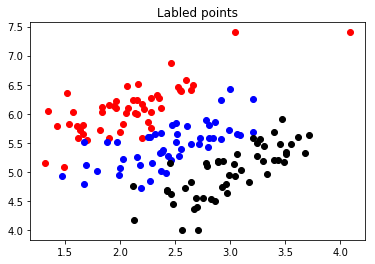

In [6]:
plotter(classes[0], 'ro')
plotter(classes[1], 'bo')
plotter(classes[2], 'ko')
plt.title("Labled points")
plt.show()

# Bigger the weight, the more separable points 

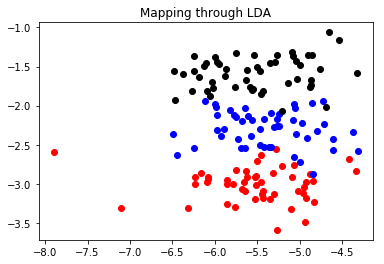

In [7]:
projection_plotter(classes[0], v, 'ro')
projection_plotter(classes[1], v, 'bo')
projection_plotter(classes[2], v, 'ko')
plt.title("Mapping through LDA")
plt.show()